In [2]:
import numpy as np
import matplotlib.pyplot as plt

(100, 1)

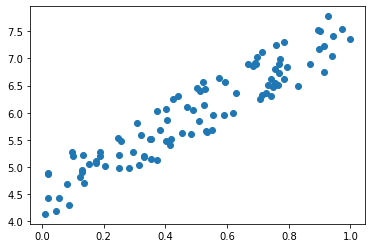

In [86]:
x = np.random.rand(100,1)  #make a random data in a column now row
y = 4 + 3 * x + np.random.rand(100,1) # data are made in a column not row
plt.scatter(x,y)
x.shape

# Normal Equation for finding theta with minimum cost function

In [19]:
X_b = np.c_[np.ones((100,1)),x]     #add a column of ones to x
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta

array([[4.51764311],
       [2.97636122]])

In [27]:
x_new = np.array([[0],[1]])
x_new_b = np.c_[np.ones((2,1)), x_new]           #add a column of ones to x_new
y_predict = x_new_b.dot(theta)
y_predict

array([[4.51764311],
       [7.49400433]])

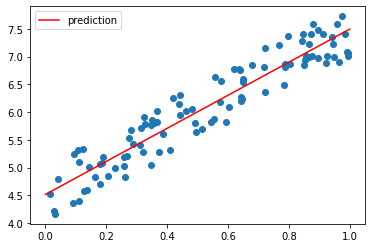

In [30]:
plt.scatter(x,y)
plt.plot(x_new, y_predict, 'r', label = 'prediction')
plt.legend()

# LinearRegression

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lin_reg = LinearRegression()
lin_reg.fit(x,y)                            #it does not need to add a column of ones
lin_reg.intercept_, lin_reg.coef_           #they are theta

(array([4.51764311]), array([[2.97636122]]))

In [34]:
y_pred = lin_reg.predict(x_new)            #it does not need to add a column of ones
y_pred

array([[4.51764311],
       [7.49400433]])

# Batch (Full) Gradient Descent for finding theta:

In [3]:
eta = 0.1                                  #learning rate
n_iterators = 1000                         #number of iteration for doing algorithm
m = 100                                    #number of samples
x = np.random.rand(100,1)                  #make a random data in a column now row
y = 4 + 3 * x + np.random.rand(100,1)      # data are made in a column not row
X_b = np.c_[np.ones((100,1)),x]            #add a column of ones to x
x_new = np.array([[0],[2]])
x_new_b = np.c_[np.ones((2,1)),x_new]
x_new_b
theta = np.random.randn(2,1)               #random initialization
theta

array([[-0.64142345],
       [-0.20090741]])

In [137]:
for iteration in range(n_iterators):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)            #MSE(theta) = 2/m *sum(h(x)-y)*x,    h(x) = theta*x
    theta = theta - eta * gradients
print(theta)


[[4.4468162]
 [3.0068027]]


In [139]:
y_pred = np.dot(x_new_b,theta)
y_pred

array([[ 4.4468162],
       [10.4604216]])

C:\Users\fatem\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
C:\Users\fatem\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
C:\Users\fatem\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until

C:\Users\fatem\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
C:\Users\fatem\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
C:\Users\fatem\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000013FACFE45E8> (for post_execute):


KeyboardInterrupt: 

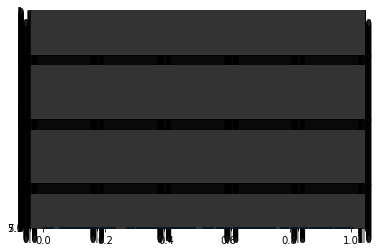

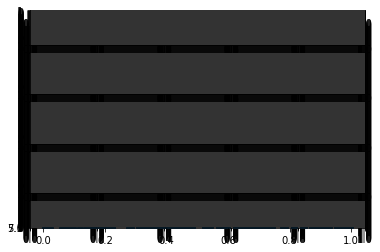

In [ ]:
eta = [0.02, 0.1]
j = 0
for iteration in range(n_iterators):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)  
    for i in eta:
        j += 1
        theta = theta - i * gradients
        #print(theta)
        y_pred = x_new_b.dot(theta)
        plt.subplots(120+j)
        plt.scatter(x,y)
        plt.plot(x_new,y_pred)



# Stochastic Gradient Descent 

In [4]:
from sklearn.linear_model import SGDRegressor

In [5]:
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
sgd_reg.fit(x,y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.50283433]), array([2.89648407]))

In [21]:
theta = np.array([[sgd_reg.intercept_[0]],[sgd_reg.coef_[0]]])
x_new = np.array([[0],[2]])
x_new_b = np.c_[np.ones((2,1)),x_new]
print(x_new_b)
y_new = x_new_b.dot(theta)
print(y_new)

[[1. 0.]
 [1. 2.]]
[[ 4.50283433]
 [10.29580248]]


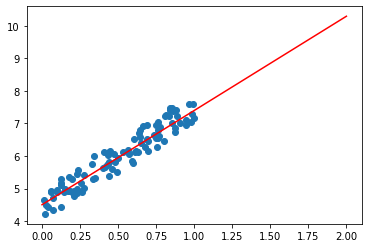

In [22]:
plt.plot(x_new, y_new,'r')
plt.scatter(x,y)

# Polynomial regression

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [27]:
poly_Feature = PolynomialFeatures(degree = 2, include_bias = False)
poly_x = poly_Feature.fit_transform(x)    #compute x with 2 degrees
x[0]
poly_x[0]          #it contains x and x^2

array([0.26253317, 0.06892367])

In [28]:
#now we can use it in linear regression:
lin_reg = LinearRegression()
lin_reg.fit(poly_x, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.48242532]), array([[ 3.03462165, -0.05795462]]))

In [29]:
y_pred = lin_reg.predict(poly_x)
y_pred

array([[5.27511973],
       [5.81046335],
       [4.53747094],
       [6.18856504],
       [6.99952644],
       [5.91314077],
       [4.86889067],
       [6.39544282],
       [4.65608667],
       [7.04733626],
       [7.45435502],
       [5.09004146],
       [4.86253589],
       [5.72907425],
       [5.78363402],
       [5.92348668],
       [6.73374016],
       [6.96599695],
       [6.9001551 ],
       [6.71374542],
       [6.07787724],
       [4.98935211],
       [6.24854211],
       [5.53901065],
       [7.43100414],
       [6.29411527],
       [7.13072723],
       [4.52621108],
       [5.79417755],
       [5.12380512],
       [7.30937138],
       [5.19099788],
       [4.92015892],
       [5.80315186],
       [4.70877491],
       [5.11707315],
       [6.76505358],
       [6.57109327],
       [6.33400666],
       [7.08104587],
       [7.38851176],
       [6.50855627],
       [7.03096416],
       [6.55771216],
       [7.42078025],
       [5.68552449],
       [5.83085867],
       [5.264

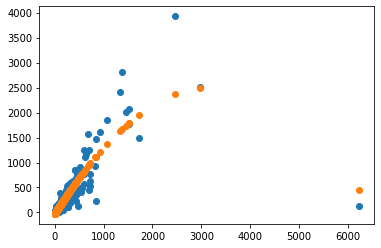

In [34]:
plt.scatter(x,y)
plt.scatter(x,y_pred)

In [36]:
x_new = np.array([[39.93],[3000]])
poly_x_new = poly_Feature.fit_transform(x_new)
y_pred = lin_reg.predict(poly_x_new)
print('prediction for Fereshteh in CIB1:',y_pred[0])

prediction for Fereshteh in CIB1: 33.005618550383424


# RMSE

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [33]:

def plot_learning_curve(model,x,y):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3,random_state = 1234)
    mse_train,mse_test = [],[]
    for m in range(1,len(y)):
        model.fit(x_train[:m],y_train[:m])
        y_train_pred = model.predict(x_train[:m])
        mse_train.append(mean_squared_error(y_train[:m],y_train_pred))
        
        y_test_pred = model.predict(x_test[:m])
        mse_test.append(mean_squared_error(y_test[:m],y_test_pred))
        
        plt.plot(np.sqrt(mse_test),'r')#,label = 'test set')
        plt.plot(np.sqrt(mse_train),'b')#, label = 'train set')
        plt.xlabel('trainnig set size')
        plt.ylabel('RMSE')
        plt.title('learning curving with increasing trainning set')
        #plt.legend()
        


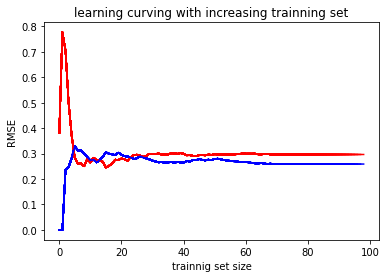

In [34]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

plot_learning_curve(lin_reg,x,y)

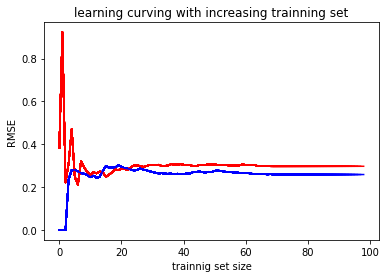

In [35]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([('poly_features', PolynomialFeatures(degree = 2, include_bias = False)),
                                  ('lin_reg',LinearRegression())])
plot_learning_curve(polynomial_regression,x,y)

# Regularization: LASSO Regression, Ridge Regression, Elastic Net in  Linear Regression

In [37]:
#first solution for using Ridge regression:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1, solver = 'cholesky')
ridge_reg.fit(x,y)
ridge_reg.predict([[1.5]])

array([[8.64567441]])

In [38]:
#second solution for using Ridge regression:
sgd_reg = SGDRegressor(penalty= 'l2')         #l2 == Ridge regression, penalty adds regularization to the algorithm
sgd_reg.fit(x, y.ravel())
sgd_reg.predict([[1.5]])


array([8.62953236])

In [41]:
#first solution for using lasso regression:
from sklearn.linear_model import Lassoa
lasso = Lasso(alpha = 0.1)
lasso.fit(x,y)
lasso.predict([[1.5]])

array([7.78687177])

In [39]:
#second solution for using lasso regression:
sgd_reg = SGDRegressor(penalty= 'l1')         #l1 == Lasso regression, penalty adds regularization to the algorithm
sgd_reg.fit(x, y.ravel())
sgd_reg.predict([[1.5]])


array([8.63858865])

In [43]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic.fit(x,y)
elastic.predict([[1.5]])

array([7.49488179])

# working on real dataset

In [19]:
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
os.chdir(r'C:\Users\fatem\Downloads\housekeeping_genes')
df = pd.read_excel('HouseKeeping genes-Trends in Genetics 29, (2013).xlsx')
df
df.dropna(inplace = True,axis = 'rows')
np.sum(pd.isna(df))
df['avg_ctl'] = (df['CT-B1'] + df['CT-Z1'])/2
data = df.values
x = data[:,-1].reshape(-1,1)
y = data[:,3]
x_new = np.array([[39.93],[3000]])

24.17469550032242 [0.6999966]
prediction for Fereshteh: [  52.12555984 2124.16450345]


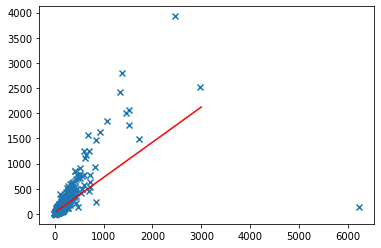

In [15]:
#linear regression:
lin_reg = LinearRegression()
lin_reg.fit(x,y)
print(lin_reg.intercept_, lin_reg.coef_)
y_pred = lin_reg.predict(x_new)
print('prediction for Fereshteh:',y_pred)

#plotting:
plt.scatter(x,y,marker = 'x')
plt.plot(x_new, y_pred,'r')

In [20]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
sgd_reg.fit(x,y.ravel())
print(sgd_reg.intercept_, sgd_reg.coef_)
print(sgd_reg.predict(x_new))

[-7.81147288e+10] [-2.32439247e+11]
[-9.35941384e+12 -6.97395854e+14]
